# Compile results

In [ ]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../baselines/scripts')
from baselines_utils import read_image, KEY, c2ap

In [9]:
baseline_directory = '../baselines/'
METHOD_LIST = os.listdir(baseline_directory)
METHOD_LIST = [m for m in METHOD_LIST if not m.startswith('scripts') and len(os.listdir(os.path.join(baseline_directory, m, 'results'))) > 0]

METHOD_LIST

['gbf', 'bm3d', 'ppb', 'fans', 'sar2sar', 'merlin', 'speckle2void', 'sarbm3d']

In [11]:
results_dict = {}

for m in METHOD_LIST:
    filenames = os.listdir(os.path.join(baseline_directory, m, 'results'))
    result_path = [os.path.join(baseline_directory, m, 'results', f) for f in filenames if f.endswith('.mat')][0]

    filtered_data = scipy.io.loadmat(result_path)
    filtered_data = filtered_data[KEY]
    filtered_data, _ = c2ap(filtered_data)

    results_dict[m] = filtered_data

results_dict.keys()

dict_keys(['gbf', 'bm3d', 'ppb', 'fans', 'sar2sar', 'merlin', 'speckle2void', 'sarbm3d'])

In [12]:
input_path = "../../dataset/input_1.mat"

raw_data = scipy.io.loadmat(input_path)
raw_data = raw_data[KEY]
raw_data, _ = c2ap(raw_data)

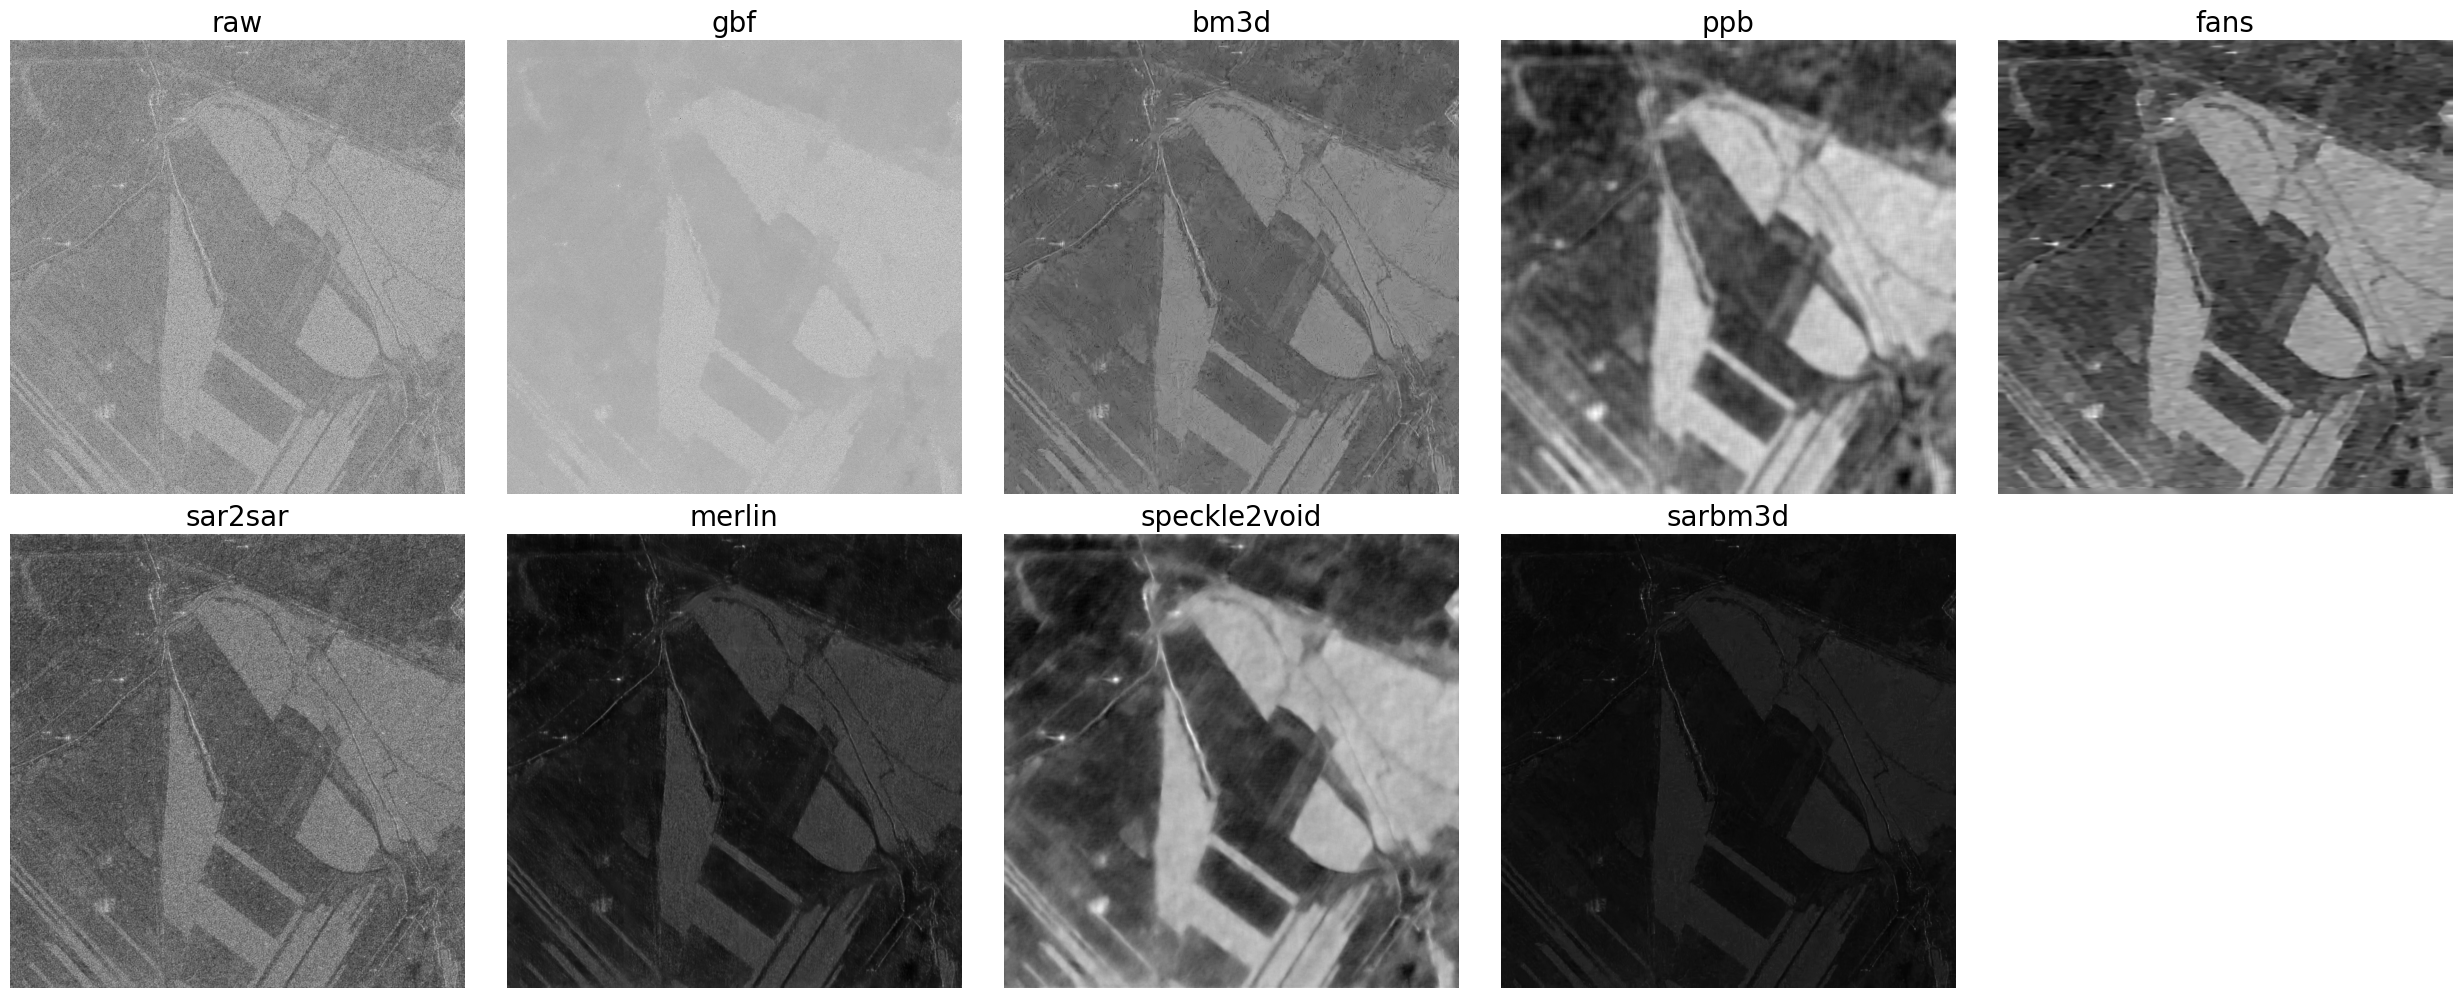

In [39]:
IMAGE_SIZE = 5
N_COLS = 5
FONTSIZE = 20

N_IMAGES = len(METHOD_LIST)
N_ROWS = int(np.ceil(N_IMAGES / N_COLS)) + 1

plt.figure(figsize=(IMAGE_SIZE * N_COLS, IMAGE_SIZE * N_ROWS))

plt.subplot(N_ROWS, N_COLS, 1)
plt.imshow(raw_data, cmap='gray')
plt.title('raw', fontsize=FONTSIZE)
plt.axis('off')

for i, METHOD in enumerate(METHOD_LIST):
    filtered_data = results_dict[METHOD]

    plt.subplot(N_ROWS, N_COLS, i + 2)
    plt.imshow(filtered_data, cmap='gray')
    plt.title(f'{METHOD}', fontsize=FONTSIZE)
    plt.axis('off')

plt.tight_layout()